<a href="https://colab.research.google.com/github/raphaelp-silva/Curso-em-video/blob/main/rascunho_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import os
# Fazendo o download da ultima versão via api
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/obesity-prediction-dataset


In [5]:
import pandas as pd

In [6]:
os.listdir(path) #listando os arquivos do diretorio

db = pd.read_csv(os.path.join(path, "ObesityDataSet_raw_and_data_sinthetic.csv"))

In [7]:
db.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


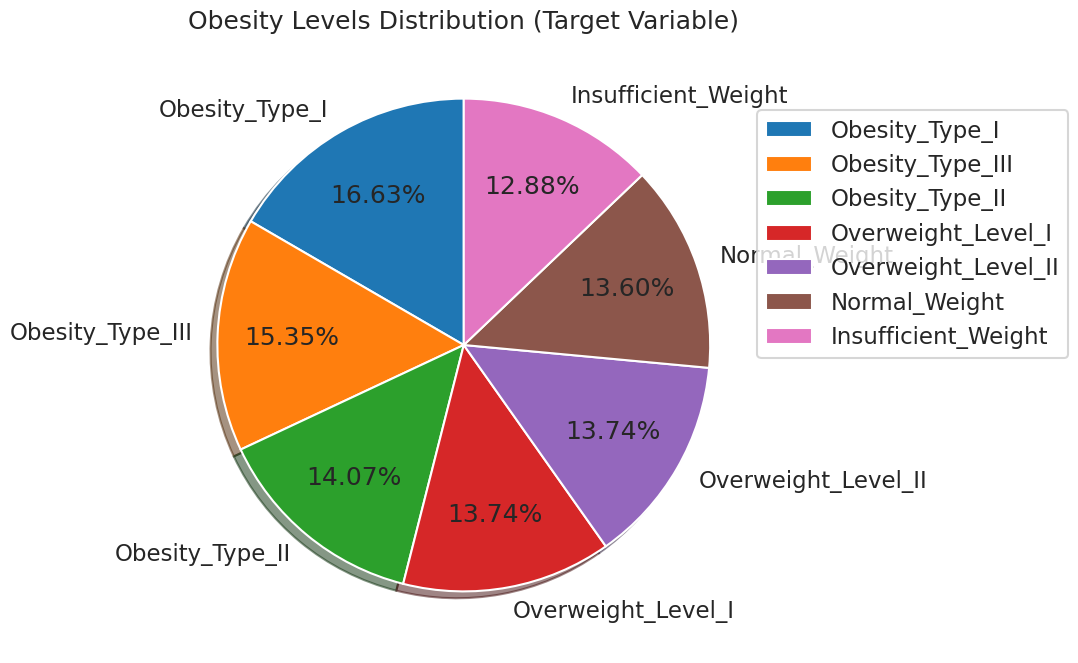

In [22]:
# distribuição das labels:

plt.figure(figsize=(8, 8))
plt.pie(
    x=db['NObeyesdad'].value_counts(),
    labels=db['NObeyesdad'].value_counts().index,
    shadow=True,
    autopct='%0.2f%%',
    startangle=90,
    pctdistance=0.7
)
plt.title('Obesity Levels Distribution (Target Variable)')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.9))
plt.show()

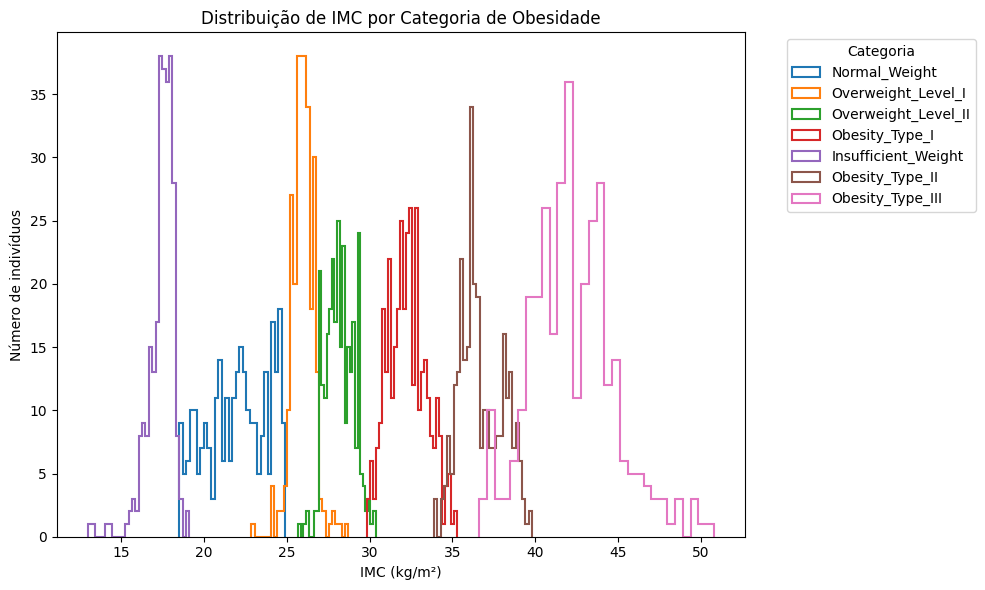

In [9]:
import matplotlib.pyplot as plt

db['BMI'] = db['Weight'] / db['Height']**2

plt.figure(figsize=(10, 6))

for categoria in db['NObeyesdad'].unique():
    subset = db[db['NObeyesdad'] == categoria]
    plt.hist(subset['BMI'],
             bins=30,
             histtype='step',
             linewidth=1.5,
             label=categoria)

plt.xlabel('IMC (kg/m²)')
plt.ylabel('Número de indivíduos')
plt.title('Distribuição de IMC por Categoria de Obesidade')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
db.groupby('NObeyesdad')['BMI'].mean()

,BMI
NObeyesdad,
Insufficient_Weight,17.405612
Normal_Weight,22.014147
Obesity_Type_I,32.269528
Obesity_Type_II,36.722109
Obesity_Type_III,42.286667
Overweight_Level_I,25.984684
Overweight_Level_II,28.212674


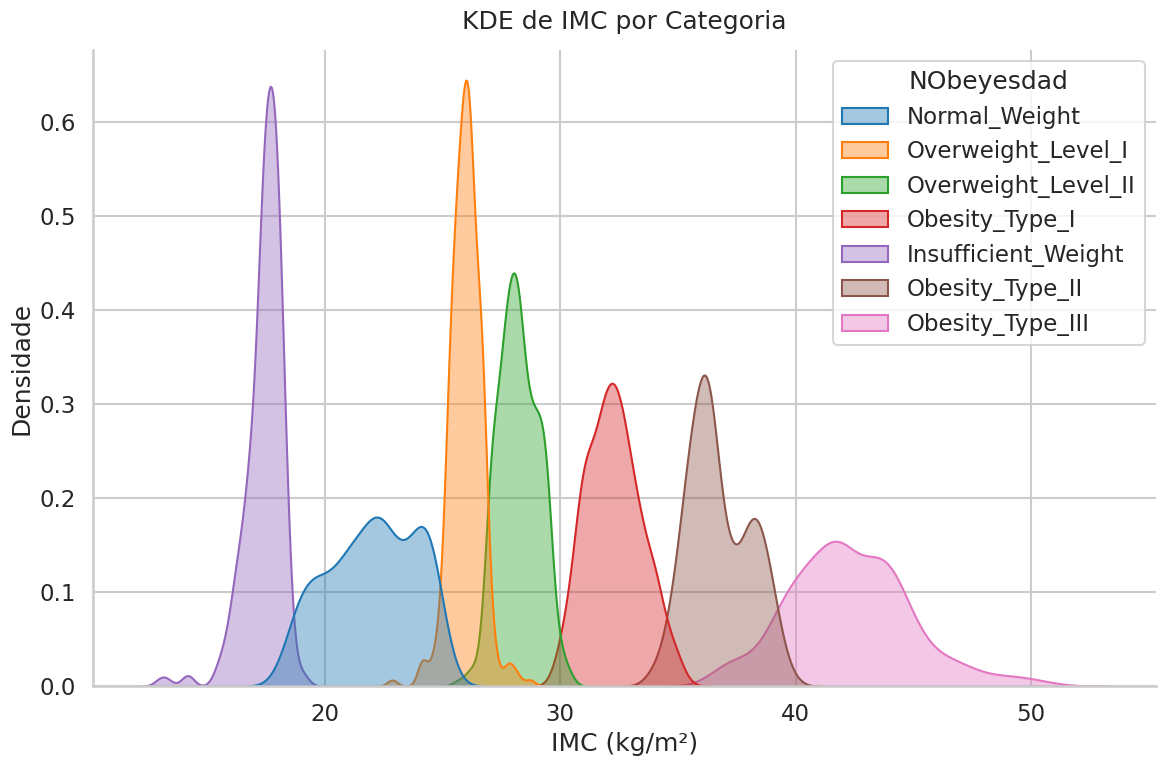

In [18]:
plt.figure(figsize=(12,8))
sns.kdeplot(
    data=db,
    x='BMI',
    hue='NObeyesdad',
    fill=True,
    alpha=0.4,
    common_norm=False,    # mantém contagem bruta
    linewidth=1.5
)
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Densidade')
plt.title('KDE de IMC por Categoria', pad=15)
sns.despine()
plt.tight_layout()
plt.show()
